# xy_sine_funcanimation
Create animation of xy chart using `matplotlib` library.


## example 5
+ Source: http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/.
+ Status: working (but not properly understood).

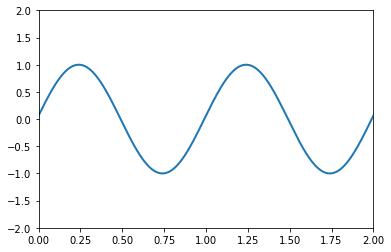

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

anim


In [13]:
anim.save('data/animation.gif', writer='imagemagick', fps=60)
Image(url='data/animation.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


## example 4
+ Source: https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
+ Status: not working in jupyter notebook

fig size: 72.0 DPI, size in inches [6. 4.]


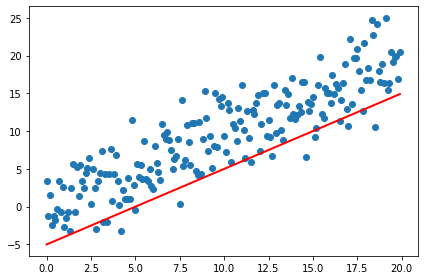

In [8]:
#import seaborn
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()

## examples 3
+ Source: https://matplotlib.org/stable/gallery/animation/simple_scatter.html.
+ Status: working (last image shown, but GIF not, must be manually included using Markdownd).

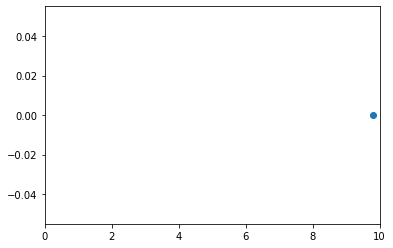

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim([0, 10])

scat = ax.scatter(1, 0)
x = np.linspace(0, 10)


def animate(i):
    scat.set_offsets((x[i], 0))
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat=True,
                              frames=len(x) - 1, interval=50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('data/scatter.gif', writer=writer)

plt.show()

![](data/scatter.gif)

## examples 2
+ Source: https://stackoverflow.com/a/71879955/9475509.
+ Status: working (for online view only with nbviewer not with github).

In [2]:
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from matplotlib import rc
rc('animation', html='jshtml')

# This is setup code
class_capacity = [100, 100, 100]
classes = ["CS1301", "CS1331", "CS1332"]
current_enrolled_students = [10, 0, 0]
fig, axes = plt.subplots(figsize=(8,6))
#axes =fig.add_subplot()
axes.set_ylim(0, 100)

cmap = plt.get_cmap("jet")

def animate(i):
    axes.clear()
    #axes.set_ylim(0, 100)
    for i in range(len(current_enrolled_students)):
        current_enrolled_students[i] = random.randint(0, class_capacity[i])
    barlist = axes.bar(classes, current_enrolled_students)
    for i in range(len(barlist)):
        barlist[i].set_color(cmap(current_enrolled_students[i] / class_capacity[i]))

ani = FuncAnimation(fig, animate, interval=400, blit=False, frames=9, repeat=False)
plt.close()
#plt.show()
ani

## examples 1
+ Source: https://matplotlib.org/stable/api/animation_api.html#funcanimation.
+ Status: not working (cause not known).

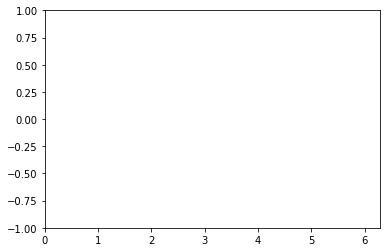

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()